# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (15,15)
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [4]:
import graphviz

In [5]:
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Для решающего дерева не важны абсолютные значения параметров, но важны порядковые свойства.
С этой идеей рассмотрим следующие преобразования:
* монотонные функции от одного признака;
Они сохраняют порядок признаков (возможно инвертируют), а следовательно не влияют на решающие деревья.
* немонотонные функции от одного признака;
Да имеет, так например $\sin x $ может позволить дереву разделить периодические величины, без которого, дерево бы бесконечно делило все $x$'ы на отрезки, переобучаясь на тренировочных данных.
Хотя, если промежуток допустимых параметров небольшой, то при достаточной глубине дерево без $\sin x$ может получить, такой-же ответ, поскольку данных конечное число, но глубина дерева будет значительно больше.
* линейные функции от нескольких признаков;
Имеет смысл, так как например разность двух величин (если одна строго больше другой) может являться удобным для использования признаком, в то время как для симуляции ветвления `if x - y > \delta` потребуется много обычных ветвлений, и не факт что точность будет такая-же.
* нелинейные функции от нескольких признаков;
 Нелинейные функции от нескольких признаков еще более широкий класс функций, чем немонотонные функции от одного признака или линейные от нескольких. Даже они не бессмысленны для дерева. Поэтому нелинейные от нескольких переменных --- тоже валидное преобразование.
* стандартизация признаков;
Стандартизация --- некое изменение признаков, которое также сохраняет порядок, поэтому это также бессмысленное для дерева преобразование. А относительное изменение ("масштабирование") признаков относительно друг-друга не влияют на деревья.
* преобразования категориальных признаков.
Да, осмысленно и необходимо, поскольку на категориальных призноках нет порядка, из-за чего дерево не сможет разделить элементы по этому параметру. А Encoding (любой) задаст хоть какой-то порядка. Например, OneHotEncoding позволит дереву создавать вершины с делением виды `if x == name_of_category`.


---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Определим интересующие нас параметры: признаки, целевой признак, категориальные и реальные.

In [6]:
# Features to take from all features
all_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
target = ['cnt']
features = list(set(all_features) - set(target))

# Categorical features
categorical_features = ['season', 'mnth']
real_feature = list(set(features) - set(categorical_features))

Загрузим датасет и разделим данные на 3 части.

In [7]:
# Read df
df_day = pd.read_csv('../Data/Bike-Sharing-Dataset/day.csv')
df_day = df_day[all_features]

# Split into train, valid and test - 3:1:1
df_train, df_test = train_test_split(df_day, test_size=0.2, random_state=24, shuffle=True)
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=24, shuffle=True)

# Check for correct shapes
print('Shapes of train: {}, valid: {}, test: {}'.format(df_train.shape, df_valid.shape, df_test.shape))
df_day.head(5)

Shapes of train: (438, 10), valid: (146, 10), test: (147, 10)


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,1600


Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики.

Создадим класс DataTransformer для удобного и главное одинакового преобразования различных выборок. (Не забываем о том, что обучаем энкодер только на train)

In [8]:
class DataTransformer:
    def __init__(self):
        self.encoder = None

    def transform(self, df, fit=False):
        '''
        Функция для преобразования данных
        '''
        # Remove dropouts
        df = df[df['hum'] > 0.2]

        # Encode categorical features
        if fit:
            self.encoder = OneHotEncoder(drop='first', sparse_output=False)
            self.encoder.fit(df_train[categorical_features])

        assert self.encoder is not None

        x_cat = self.encoder.transform(df[categorical_features])
        x_real = df[real_feature]

        X = np.hstack([x_real, x_cat])
        Y = df[target]
        return X, Y


Преобразуем все необходимые данные.

In [11]:
transformer = DataTransformer()
X_train, Y_train = transformer.transform(df_train, fit=True)
X_valid, Y_valid = transformer.transform(df_valid, fit=False)
X_test, Y_test = transformer.transform(df_test, fit=False)

Запомним список названий параметров.

In [12]:
encoded_features = transformer.encoder.get_feature_names_out()
all_encoded_features = np.append(np.array(real_feature), encoded_features)

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

Функция для визуализации дерева.

In [13]:
def get_graphviz_graph(decision_tree_regressor):
    '''
    Функция для построения
    по дереву графа graphviz и визуализация
    '''
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, class_names='Price',
        feature_names=all_encoded_features,
        filled=True, rounded=True, special_characters=True
    )
    return graphviz.Source(dot_data)

Определим и обучим дерево.

In [14]:
estimator = DecisionTreeRegressor(criterion='squared_error', random_state=42, max_depth=3)
estimator.fit(X_train, Y_train);

Посмотрим на него и сохраним.

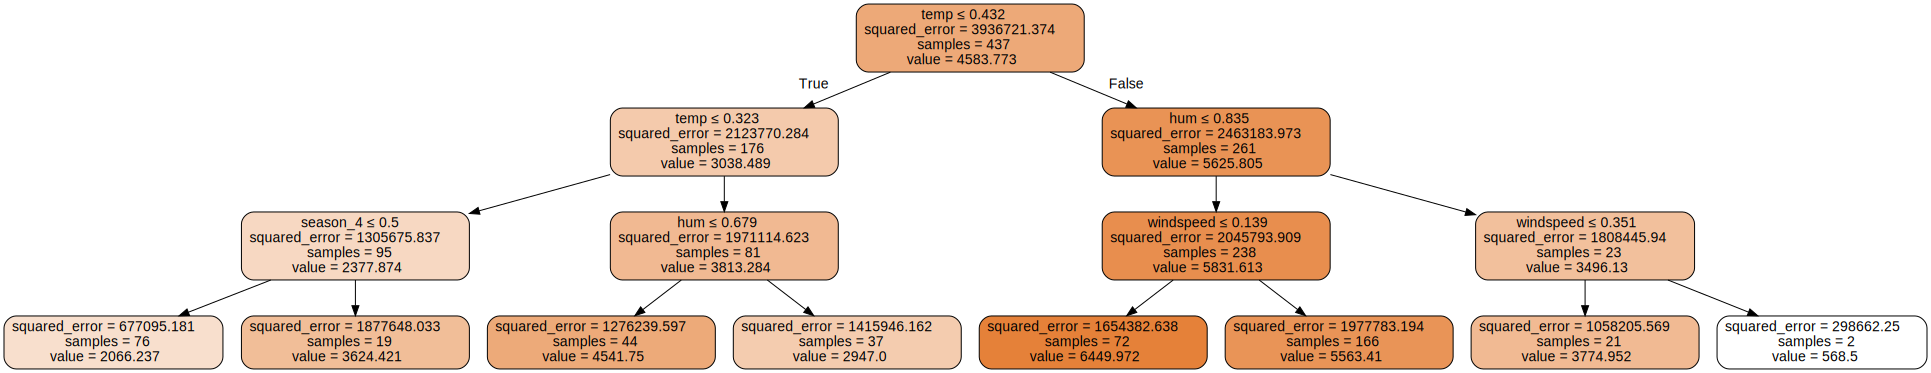

In [15]:
graph = get_graphviz_graph(estimator)
graph.render(directory='../Pictures/Tree/', view=False)
graph

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

Переберем деревья с различными глубинами и посчитаем среднеквадратичную ошибку.

In [16]:
# Create grid
depth_grid = np.arange(2, 20)

# Create arrays for errors
MSE = []
MAE = []
MAPE = []

# Loop through this grid
for depth in depth_grid:
    # Train tree with this max depth
    estimator = DecisionTreeRegressor(criterion='squared_error', random_state=42,
                                      max_depth=depth)
    estimator.fit(X_train, Y_train)

    # Make predictions
    Y_valid_pred = estimator.predict(X_valid)
    Y_train_pred = estimator.predict(X_train)

    # Calculate metrics
    mse = (mean_squared_error(Y_valid, Y_valid_pred), mean_squared_error(Y_train, Y_train_pred))
    mae = (mean_absolute_error(Y_valid, Y_valid_pred), mean_absolute_error(Y_train, Y_train_pred))
    mape = (mean_absolute_percentage_error(Y_valid, Y_valid_pred), mean_absolute_percentage_error(Y_train, Y_train_pred))
    MSE.append(mse), MAE.append(mae), MAPE.append(mape)

In [17]:
MSE = np.array(MSE)
MAE = np.array(MAE)
MAPE = np.array(MAPE)

Графики метрик в зависимости от максимальной глубины дерева.

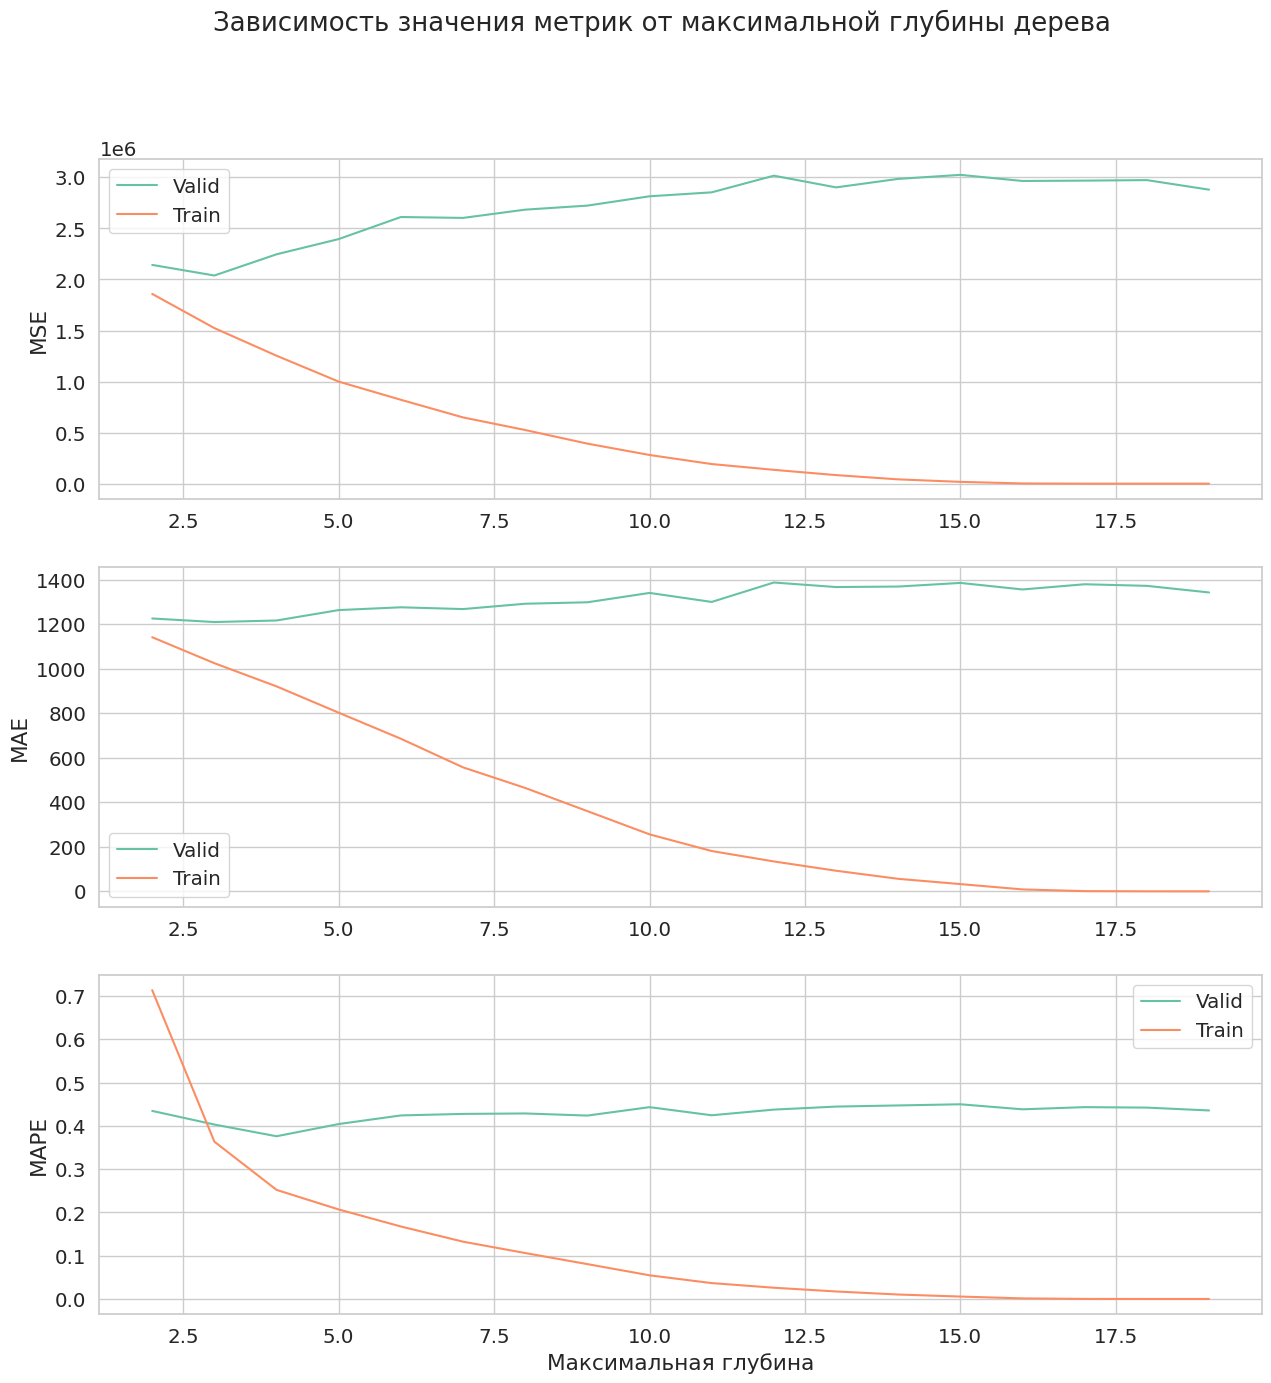

In [18]:
# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Labels
label_text = ['Valid', 'Train']

#Plot subplots
ax1.plot(depth_grid, MSE, label=label_text)
ax1.set_ylabel('MSE')
ax1.legend()

ax2.plot(depth_grid, MAE, label=label_text)
ax2.set_ylabel('MAE')
ax2.legend()

ax3.plot(depth_grid, MAPE, label=label_text)
ax3.set_ylabel('MAPE')
ax3.legend()

# Set title and labels
plt.suptitle(r"Зависимость значения метрик от максимальной глубины дерева")
plt.xlabel(r'Максимальная глубина');

Найдем Оптимальное значение максимальной глубины. Критерий выбора --- минимальность MSE на валидационной выборке.

In [19]:
optimal_max_depth = depth_grid[np.argmin(MSE[:,0])]
print('Optimal max depth for deposition tree for this dataset is {}.'.format(optimal_max_depth))

Optimal max depth for deposition tree for this dataset is 3.


Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

Переберем деревья, с различными минимальными размерами листьев и посчитаем для них метрики.

In [20]:
# Create grid
samples_grid = np.arange(1, 60)

# Create arrays for errors
MSE = []
MAE = []
MAPE = []

# Loop through this grid
for sample in samples_grid:
    # Train tree with this max depth
    estimator = DecisionTreeRegressor(criterion='squared_error', random_state=42,
                                      max_depth=optimal_max_depth,
                                      min_samples_leaf=sample)
    estimator.fit(X_train, Y_train)

    # Make predictions
    Y_valid_pred = estimator.predict(X_valid)
    Y_train_pred = estimator.predict(X_train)

    # Calculate metrics
    mse = (mean_squared_error(Y_valid, Y_valid_pred), mean_squared_error(Y_train, Y_train_pred))
    mae = (mean_absolute_error(Y_valid, Y_valid_pred), mean_absolute_error(Y_train, Y_train_pred))
    mape = (mean_absolute_percentage_error(Y_valid, Y_valid_pred), mean_absolute_percentage_error(Y_train, Y_train_pred))
    MSE.append(mse), MAE.append(mae), MAPE.append(mape)

In [21]:
MSE = np.array(MSE)
MAE = np.array(MAE)
MAPE = np.array(MAPE)

Построим искомые графики.

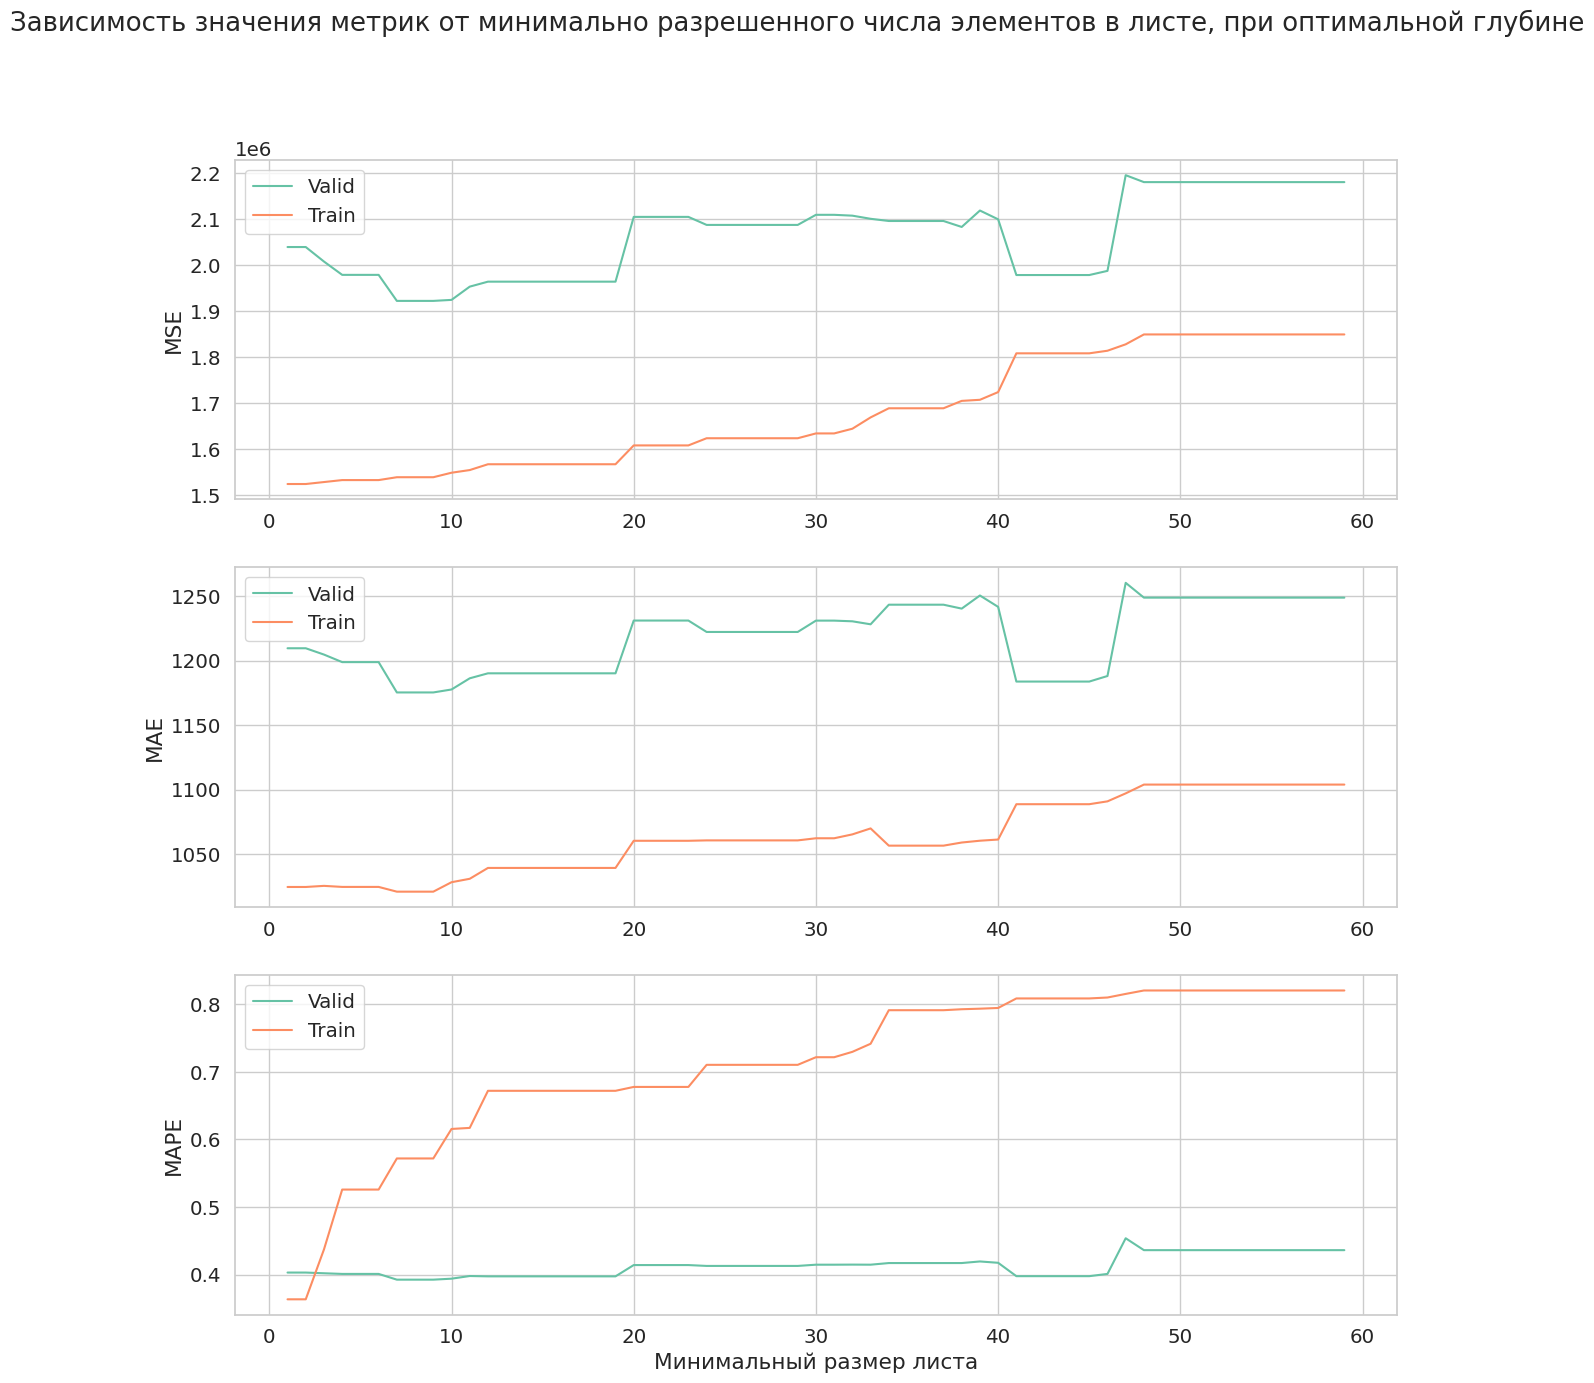

In [22]:
# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Labels
label_text = ['Valid', 'Train']

#Plot subplots
ax1.plot(samples_grid, MSE, label=label_text)
ax1.set_ylabel('MSE')
ax1.legend()

ax2.plot(samples_grid, MAE, label=label_text)
ax2.set_ylabel('MAE')
ax2.legend()

ax3.plot(samples_grid, MAPE, label=label_text)
ax3.set_ylabel('MAPE')
ax3.legend()

# Set title and labels
plt.suptitle(r"Зависимость значения метрик от минимально разрешенного числа элементов в листе, при оптимальной глубине")
plt.xlabel(r'Минимальный размер листа');

In [23]:
optimal_sample = samples_grid[np.argmin(MSE[:,0])]
print('Optimal min sample leaf for deposition tree for this dataset is {}.'.format(optimal_sample))

Optimal min sample leaf for deposition tree for this dataset is 7.


Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

Построение и визуализация дерева при оптимальных параметрах.

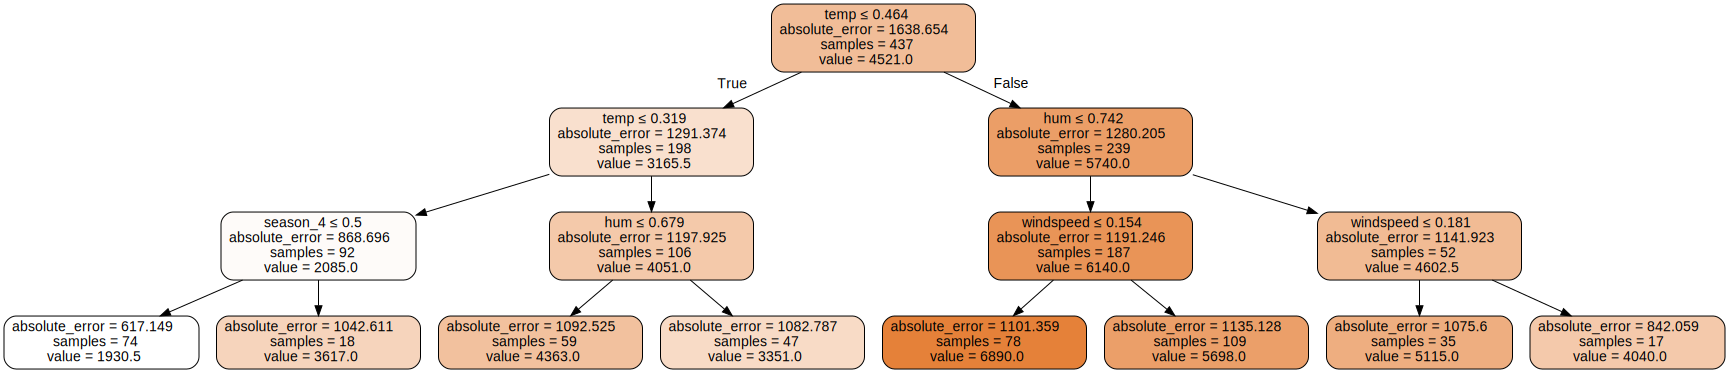

In [24]:
estimator = DecisionTreeRegressor(criterion='absolute_error', random_state=42,
                                  max_depth=optimal_max_depth,
                                  min_samples_leaf=optimal_sample)
estimator.fit(X_train, Y_train)
graph = get_graphviz_graph(estimator)
graph.render(directory='../Pictures/Tree-optimal/', view=False)
graph

Посчитаем ошибку на тестовой выборке.

In [25]:
# Make prediction
Y_test_pred = estimator.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)
mape = mean_absolute_percentage_error(Y_test, Y_test_pred)

print('On Test: MSE: {:.8}, MAE: {:.5}, MAPE: {:.3}.'.format(mse, mae, mape))

On Test: MSE: 2149560.6, MAE: 1170.9, MAPE: 0.326.


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [26]:
value_df = pd.DataFrame({'feature' : all_encoded_features,
                         'importance' : estimator.feature_importances_})
# value_df

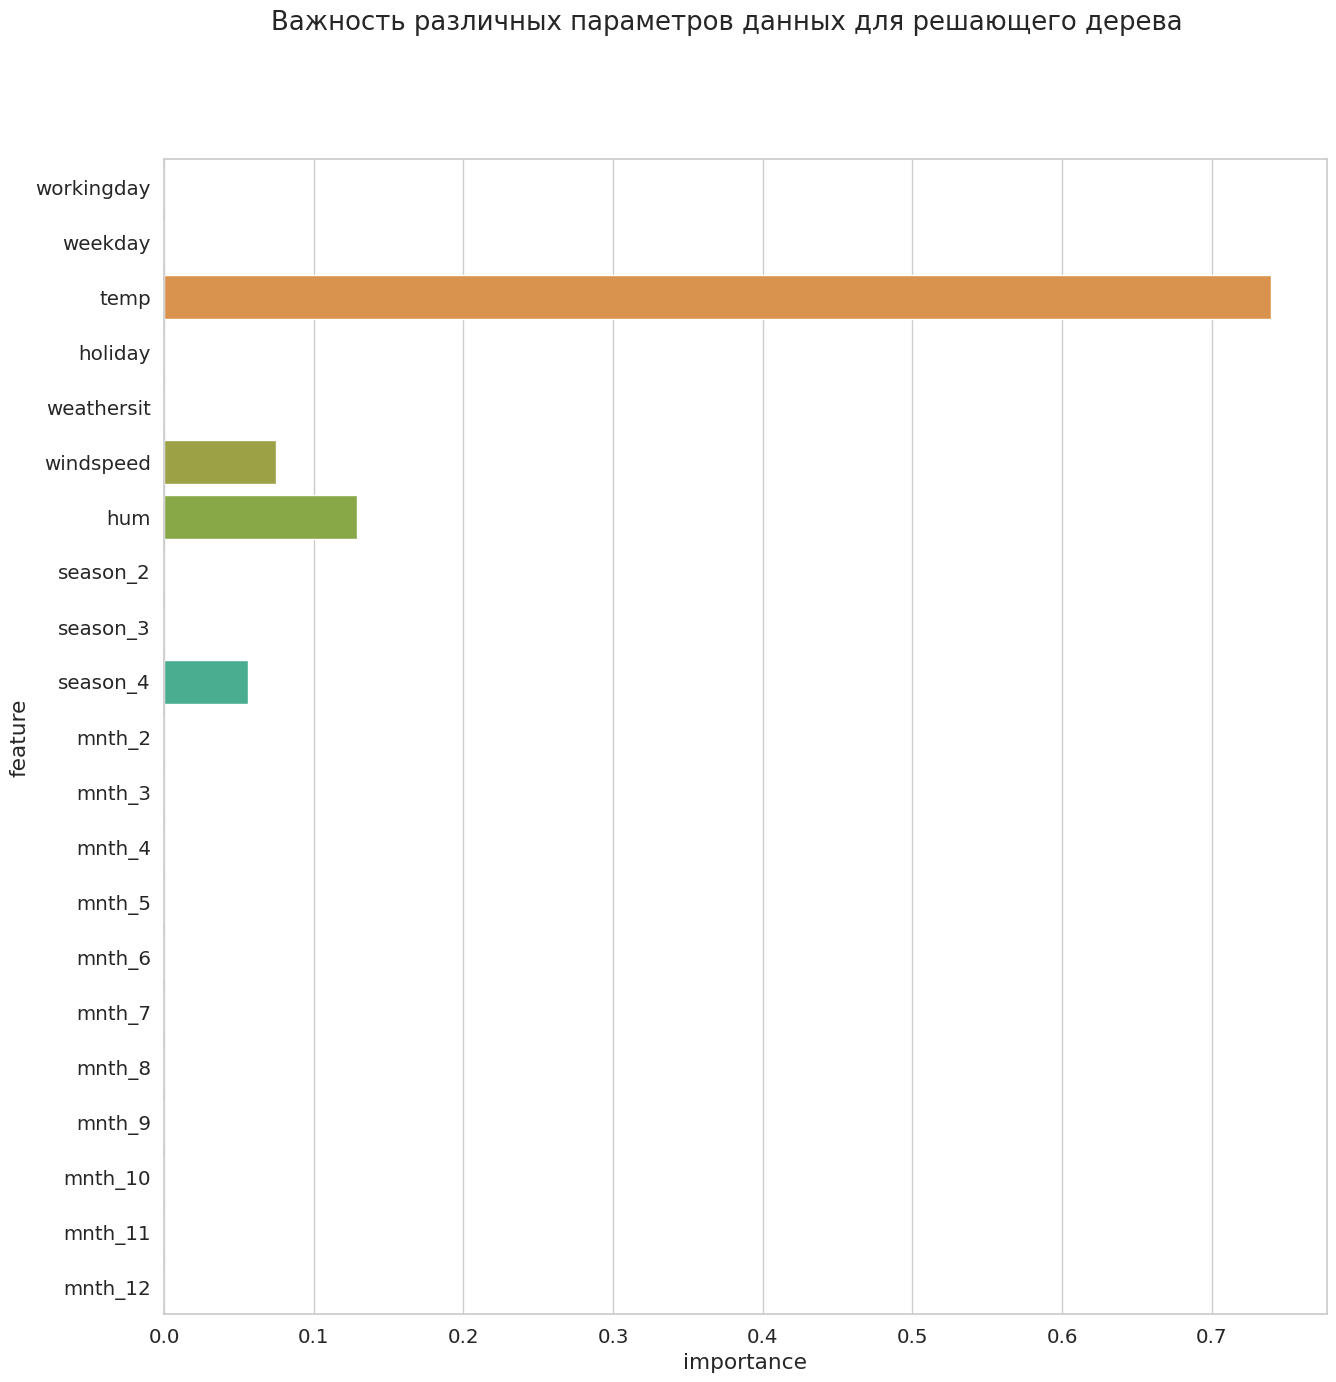

In [27]:
sns.barplot(data=value_df, y='feature', x='importance')
plt.suptitle(r"Важность различных параметров данных для решающего дерева");

### Выводы
* Во-первых, стоит отметить, что решающее дерево предоставляет лучшее интуитивное понимание оптимального решения задачи: это визуализация непосредственно решающим деревом, а таке диаграммой важности признаков. В качестве аналогии для линейной регрессии можно было бы рассмотреть значения $\theta$, но при более сложно функции потерь смысл этих значений может быть не так очевиден, как результат работы решающего дерева.
* Во-вторых, для решения задачи с помощью решающего дерева не нужно так сильно беспокоиться о сильнозависимых данных или о стандартизации признаков. Но здесь нужно помнить, что важную роль играют порядковые зависимости.
* При этом самым важным параметром оказалась температура, также немного влажность и скорость ветра. Метрика на тестовой выборке MAPE: 0.32.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [28]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, np.ravel(Y_train));

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Для каждого подотрезка деревьев посчитаем предсказания каждого и усредним для валидационной и тренировочной выборок.

In [29]:
# Create grid
estimators_grid = np.arange(1, n_estimators)

# Create arrays for errors
MSE = []
MAE = []
MAPE = []

# Loop through this grid
for size in estimators_grid:
    # "Не нужно заново обучать лес каждый раз" но не нельзя
    # # Set random forest
    # estimator = RandomForestRegressor(n_estimators=size)
    # estimator.fit(X_train, np.ravel(Y_train))
    # estimator.estimator_ = model.estimators_[:size]
    # # Make predictions
    # Y_valid_pred = estimator.predict(X_valid)
    # Y_train_pred = estimator.predict(X_train)

    # Через for оказалось быстрее
    Y_valid_pred = []
    Y_train_pred = []
    trees = np.array(model.estimators_[:size])
    for tree in trees:
        Y_valid_pred.append(tree.predict(X_valid))
        Y_train_pred.append(tree.predict(X_train))

    Y_valid_pred = np.array(Y_valid_pred).mean(axis=0)
    Y_train_pred = np.array(Y_train_pred).mean(axis=0)


    # Calculate metrics
    mse = (mean_squared_error(Y_valid, Y_valid_pred), mean_squared_error(Y_train, Y_train_pred))
    mae = (mean_absolute_error(Y_valid, Y_valid_pred), mean_absolute_error(Y_train, Y_train_pred))
    mape = (mean_absolute_percentage_error(Y_valid, Y_valid_pred), mean_absolute_percentage_error(Y_train, Y_train_pred))
    MSE.append(mse), MAE.append(mae), MAPE.append(mape)

In [30]:
MSE = np.array(MSE)
MAE = np.array(MAE)
MAPE = np.array(MAPE)

Построим графики

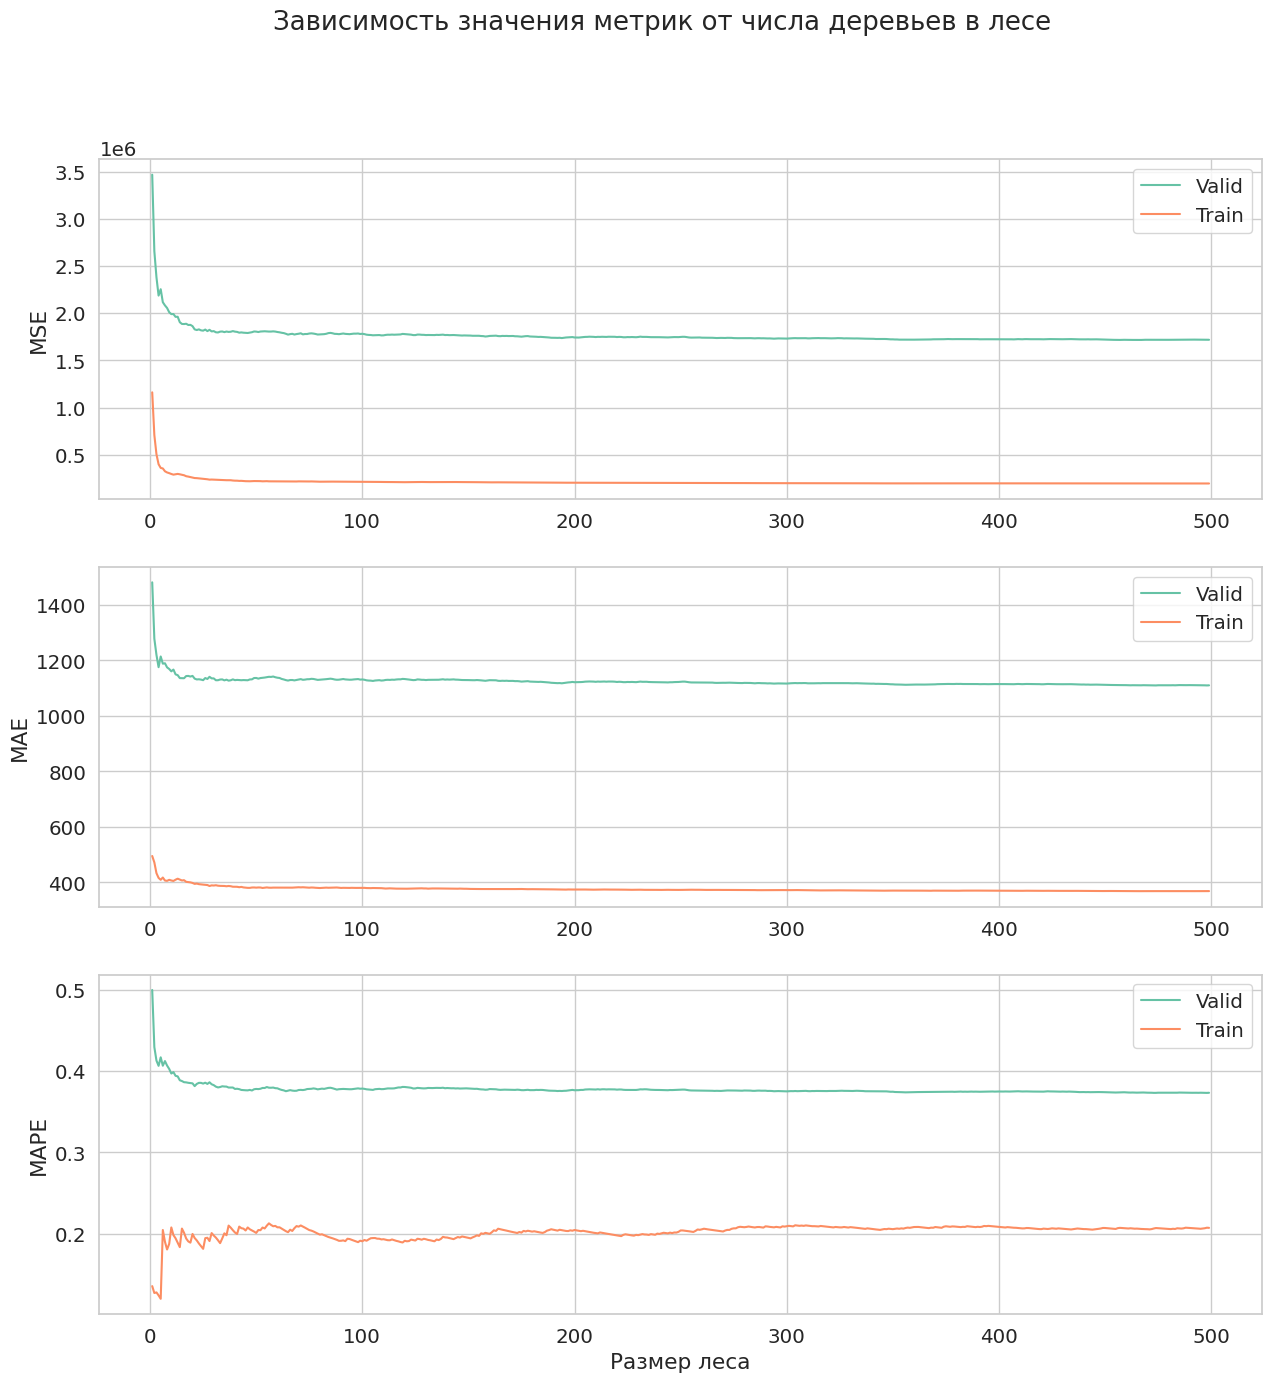

In [31]:
# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Labels
label_text = ['Valid', 'Train']

#Plot subplots
ax1.plot(estimators_grid, MSE, label=label_text)
ax1.set_ylabel('MSE')
ax1.legend()

ax2.plot(estimators_grid, MAE, label=label_text)
ax2.set_ylabel('MAE')
ax2.legend()

ax3.plot(estimators_grid, MAPE, label=label_text)
ax3.set_ylabel('MAPE')
ax3.legend()

# Set title and labels
plt.suptitle(r"Зависимость значения метрик от числа деревьев в лесе")
plt.xlabel(r'Размер леса');

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

In [32]:
value_df = pd.DataFrame({'feature' : all_encoded_features,
                         'importance' : model.feature_importances_})
# value_df

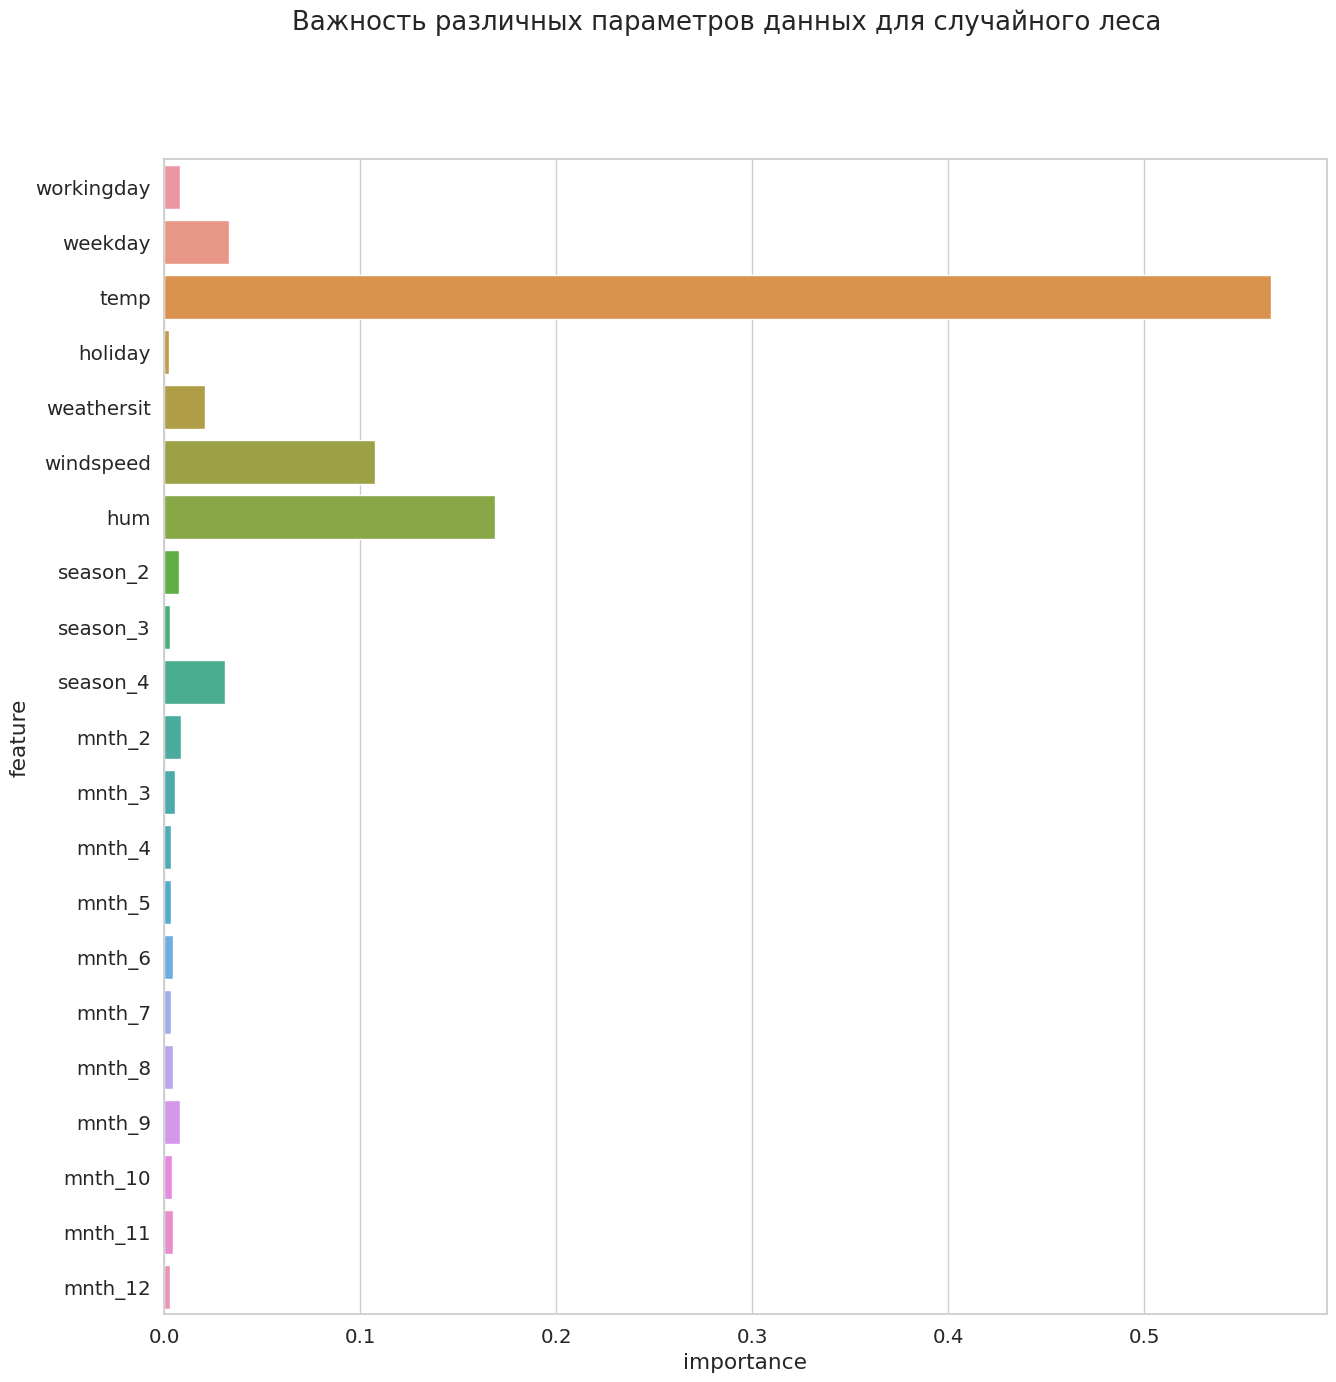

In [33]:
sns.barplot(data=value_df, y='feature', x='importance')
plt.suptitle(r"Важность различных параметров данных для случайного леса");

In [34]:
# Make prediction
Y_test_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)
mape = mean_absolute_percentage_error(Y_test, Y_test_pred)

print('On Test: MSE: {:.8}, MAE: {:.5}, MAPE: {:.3}.'.format(mse, mae, mape))

On Test: MSE: 1513145.0, MAE: 1028.7, MAPE: 0.27.


### Выводы
* Случайный лес усредняет результаты многих случайных деревьев, для получения более точного результата. Как оказалось, чем больше деревьев, тем лучше получается результат, так как такая модель устойчива против переобучения.
* Как мы теперь видим по диаграмме важности признаков, теперь в решении задействован каждый признак, а не только самые важные или эффективные. Но тренд на важные признаки остается такой же.
* На тестовой выборке случайный лес показал себя лучше, чем одно деремо: MAPE: 0.27.